### Bike Share Prediction using Linear Regression

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.api import OLS

%matplotlib inline

In [44]:
bike_df = pd.read_csv('bike_share.csv')

bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### EDA

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


Observations there is no null value in all columns

In [4]:
bike_df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [5]:
bike_df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [6]:
bike_df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [7]:
bike_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

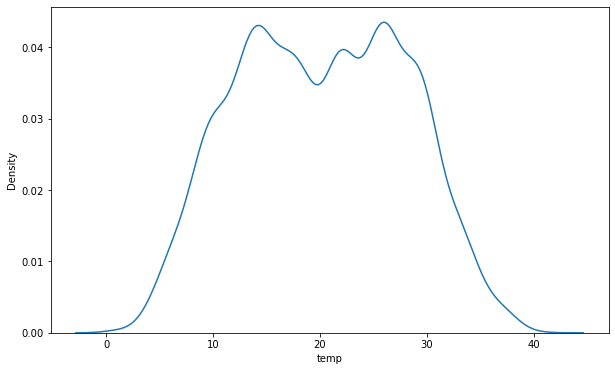

In [82]:
plt.figure(figsize = (10,6))
sns.kdeplot(bike_df['temp']);

In [9]:
bike_df.atemp.value_counts().iloc[:5]

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

<AxesSubplot:xlabel='atemp', ylabel='Density'>

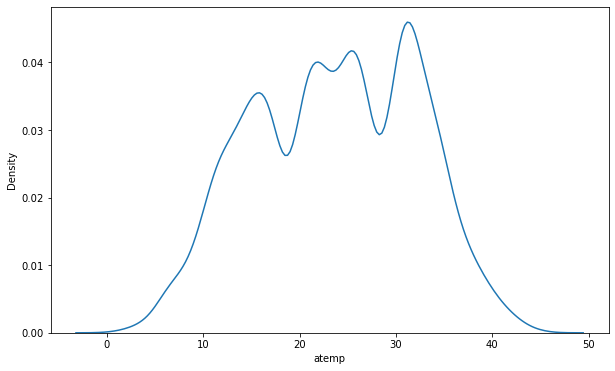

In [10]:
plt.figure(figsize = (10,6))
sns.kdeplot(bike_df['atemp'])

In [11]:
bike_df.humidity.nunique()

89

<AxesSubplot:xlabel='humidity', ylabel='Density'>

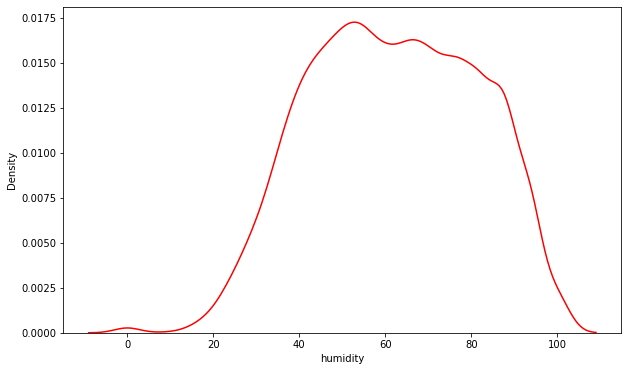

In [12]:
plt.figure(figsize = (10,6))
sns.kdeplot(bike_df['humidity'], color = 'r')

In [13]:
bike_df.windspeed.nunique()

28

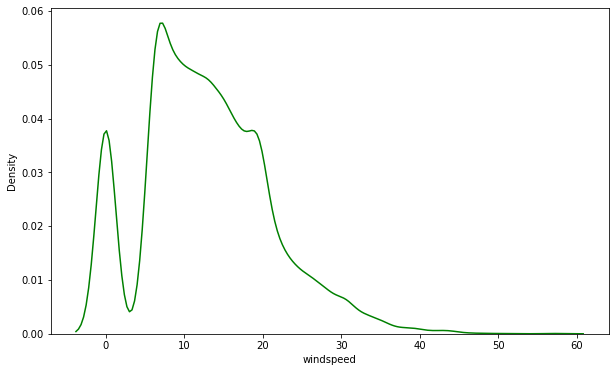

In [14]:
plt.figure(figsize = (10,6))
sns.kdeplot(bike_df['windspeed'], color = 'g');

In [15]:
bike_df.casual.value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
291      1
327      1
331      1
355      1
299      1
Name: casual, Length: 309, dtype: int64

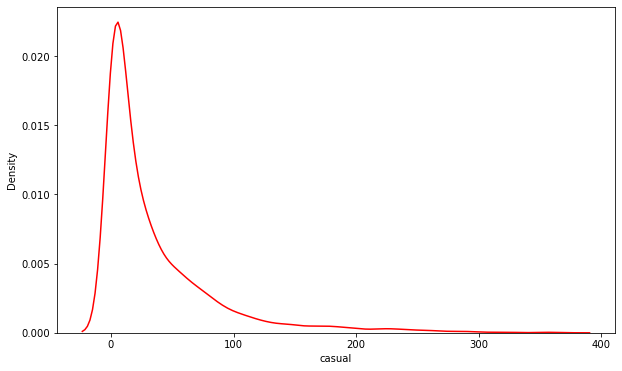

In [16]:
plt.figure(figsize = (10,6))
sns.kdeplot(bike_df['casual'], color = 'r');

In [17]:
bike_df.registered.value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
577      1
561      1
537      1
521      1
839      1
Name: registered, Length: 731, dtype: int64

In [18]:
bike_df['count'].nunique()

822

<AxesSubplot:>

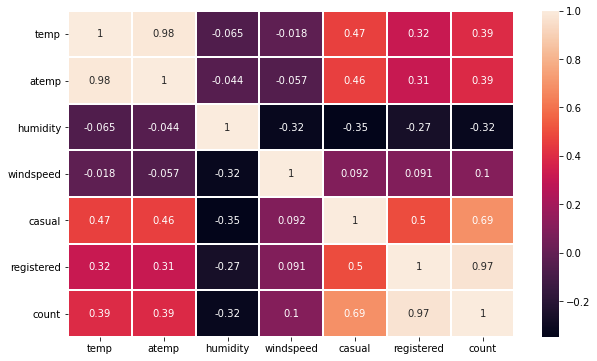

In [19]:
corr = bike_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, linewidths = True)

In [52]:
#since there is multi collinearity between temp and atemp we can drop that column

bike_df.drop('atemp', inplace = True, axis = 1)

In [53]:
bike_df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,81,0.0,3,13,16
1,1,0,0,1,9.02,80,0.0,8,32,40
2,1,0,0,1,9.02,80,0.0,5,27,32
3,1,0,0,1,9.84,75,0.0,3,10,13
4,1,0,0,1,9.84,75,0.0,0,1,1


### Train Test Split

In [54]:
X = bike_df.drop('count', axis = 1)

y = bike_df['count']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### Modelling

In [57]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [58]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

### Error Metrics

In [60]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*12)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  9.647833275940141e-13
Train MSE:  1.596565824452052e-24
Train RSME:  1.2635528577990127e-12
Train R2:  1.0
_ __ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  9.425434849156072e-13
Test MSE:  1.5483022995830626e-24
Test RSME:  1.244307960105963e-12
Test R2:  1.0


<AxesSubplot:xlabel='count'>

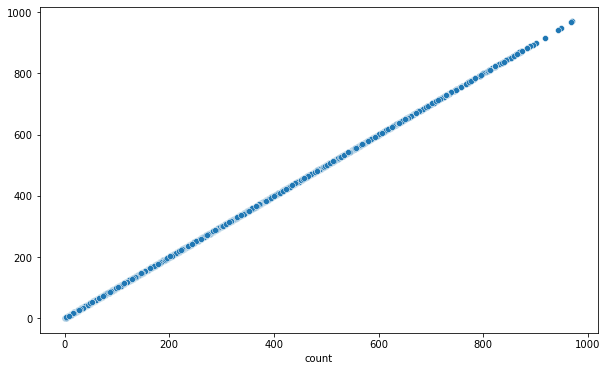

In [61]:
plt.figure(figsize = (10,6))
#Train prediction data mapping
sns.scatterplot(x = y_train, y = train_pred)

<AxesSubplot:xlabel='count'>

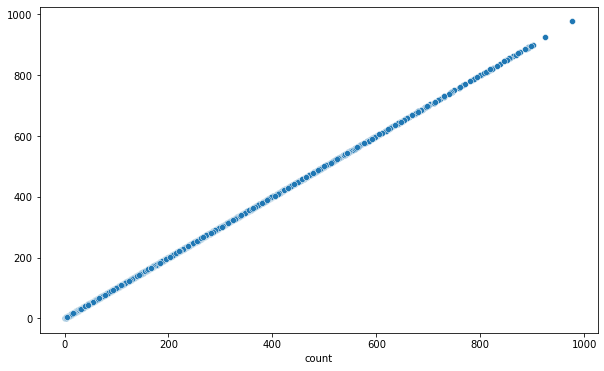

In [62]:
plt.figure(figsize = (10,6))
#Train prediction data mapping
sns.scatterplot(x = y_test, y = test_pred)

### Homoscedasticity

<AxesSubplot:title={'center':'Residuals vs Predicted Count'}, xlabel='Predicted Count', ylabel='Residuals'>

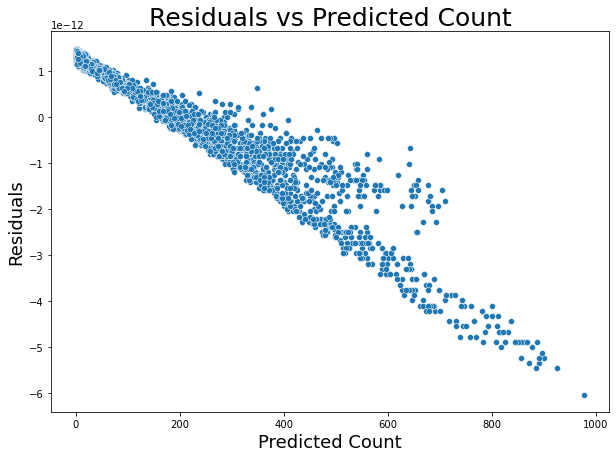

In [67]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs Predicted Count",fontsize=25)
plt.xlabel("Predicted Count",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
sns.scatterplot(x = test_pred, y = (y_test - test_pred))
#follows the same variance

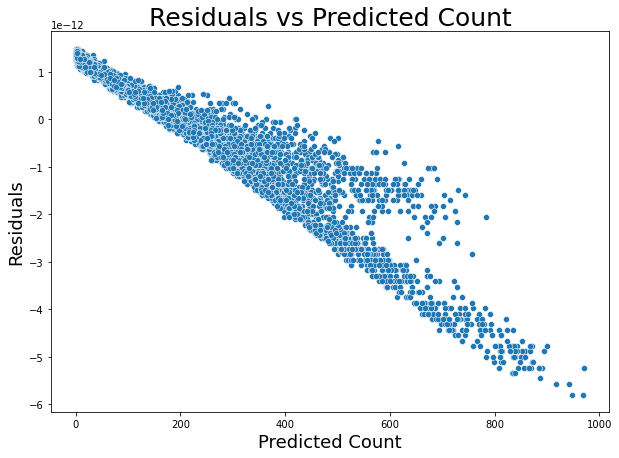

In [69]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs Predicted Count",fontsize=25)
plt.xlabel("Predicted Count",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
sns.scatterplot(x = train_pred, y = (y_train - train_pred));
#follows the same variance

In [64]:
reg_ols = OLS(y, X).fit()

In [65]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.300e+32
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:14:18   Log-Likelihood:                      2.9843e+05
No. Observations:               10886   AIC:                                 -5.968e+05
Df Residuals:                   10877   BIC:                                 -5.968e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season     -1.652e-13   2.74e-15    -60.343      0.000   -1.71e-13    -1.6e-13
holiday    -3.064e-14   1.78e-14     -1.718      0.086   -6.56e-14    4.32e-15
workingday  4.476e-13   7.03e-15     63.659      0.000    4.34e-13    4.61e-13
weather      5.24e-14   5.03e-15     10.416      0.000    4.25e-14    6.23e-14
temp         1.11e-15    4.3e-16      2.585      0.010    2.68e-16    1.95e-15
humidity   -9.992e-16   1.54e-16     -6.492      0.000    -1.3e-15   -6.97e-16
windspeed   3.886e-15   3.32e-16     11.707      0.000    3.24e-15    4.54e-15
casual         1.0000   8.43e-17   1.19e+16      0.000       1.000       1.000
registered     1.0000   2.38e-17   4.21e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      605.872   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.474
Skew:                           0.242   Prob(JB):                     2.31e-68
Kurtosis:                       2.327   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations :
* P-values are considerably low for all variable, that states all independent variables add significance to dependant variable so we don't need to ignore any independent variables